In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cab_data = pd.read_csv('Cab_Data.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')
city_data = pd.read_csv('City.csv')


In [2]:


# Merge transaction_data and customer_data
data = transaction_data.merge(customer_data, on='Customer ID', how='left')

# Merge data with cab_data
data = data.merge(cab_data, on='Transaction ID', how='left')

# Merge data with city_data
data = data.merge(city_data, left_on='City', right_on='City', how='left')


In [3]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Fill missing values
data.fillna(method='ffill', inplace=True)


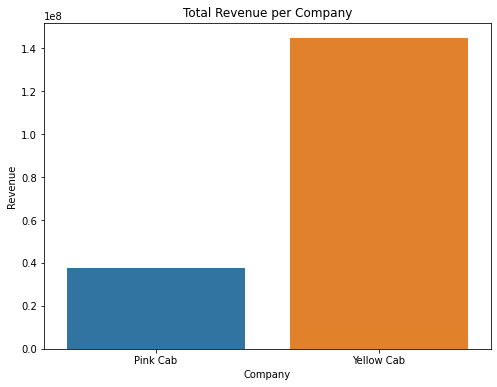

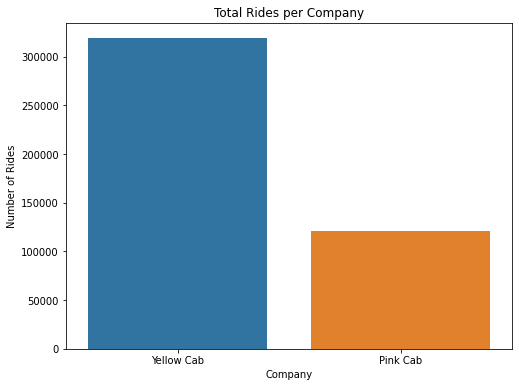

In [4]:
# Calculate total revenue for each company
company_revenue = data.groupby('Company')['Price Charged'].sum()

# Calculate total rides for each company
company_rides = data['Company'].value_counts()

# Plot company revenue
plt.figure(figsize=(8, 6))
sns.barplot(x=company_revenue.index, y=company_revenue.values)
plt.title('Total Revenue per Company')
plt.xlabel('Company')
plt.ylabel('Revenue')
plt.show()

# Plot company rides
plt.figure(figsize=(8, 6))
sns.barplot(x=company_rides.index, y=company_rides.values)
plt.title('Total Rides per Company')
plt.xlabel('Company')
plt.ylabel('Number of Rides')
plt.show()


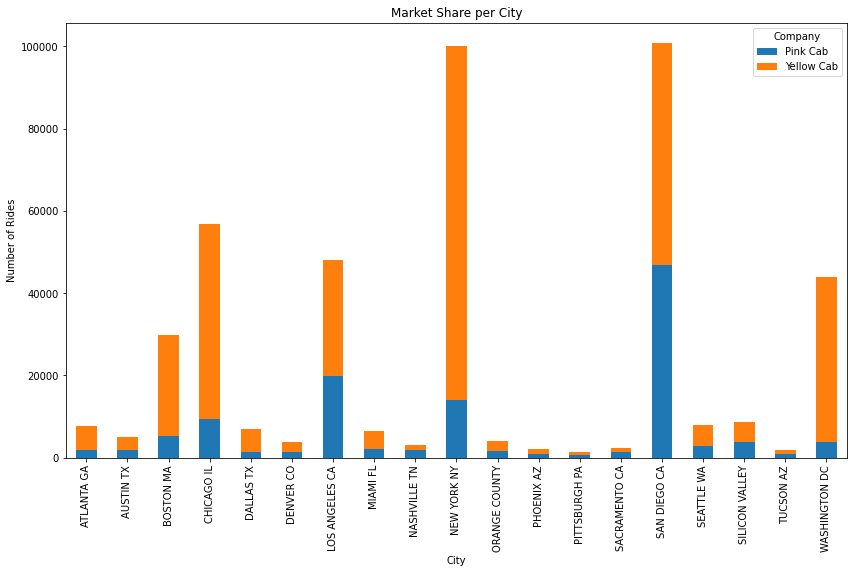

In [14]:
# Calculate market share in each city
city_market_share = data.groupby(['City', 'Company']).size().unstack(fill_value=0)

# Plot market share in each city
city_market_share.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Market Share per City')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.show()


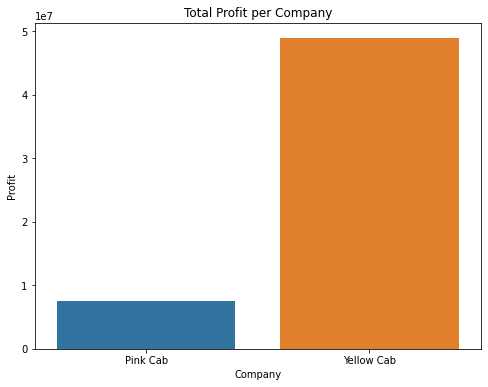

In [16]:
# REVENUE AND PROFIT COMPARISON
# Calculate profit for each company
data['Profit'] = data['Price Charged'] - data['Cost of Trip']
company_profit = data.groupby('Company')['Profit'].sum()

# Plot company profit
plt.figure(figsize=(8, 6))
sns.barplot(x=company_profit.index, y=company_profit.values)
plt.title('Total Profit per Company')
plt.xlabel('Company')
plt.ylabel('Profit')
plt.show()


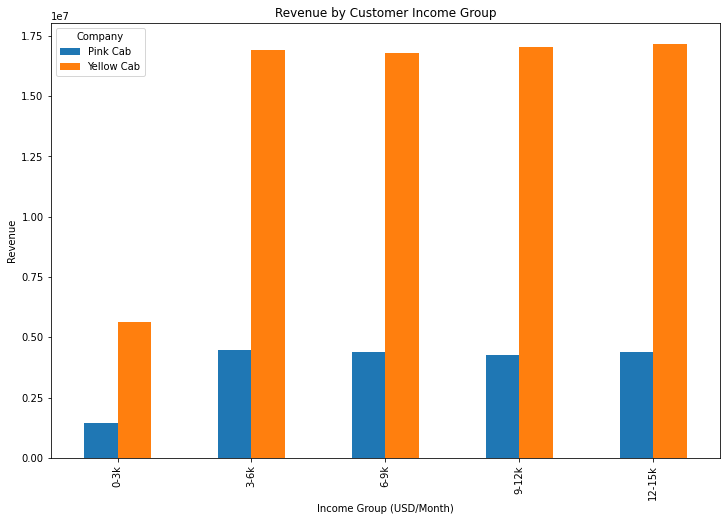

In [17]:
# Revenue by customer income group:
# Categorize income into groups
data['Income Group'] = pd.cut(data['Income (USD/Month)'], bins=[0, 3000, 6000, 9000, 12000, 15000], labels=['0-3k', '3-6k', '6-9k', '9-12k', '12-15k'])

# Calculate revenue by income group
income_revenue = data.groupby(['Income Group', 'Company'])['Price Charged'].sum().unstack()

# Plot revenue by income group
income_revenue.plot(kind='bar', figsize=(12, 8))
plt.title('Revenue by Customer Income Group')
plt.xlabel('Income Group (USD/Month)')
plt.ylabel('Revenue')
plt.show()


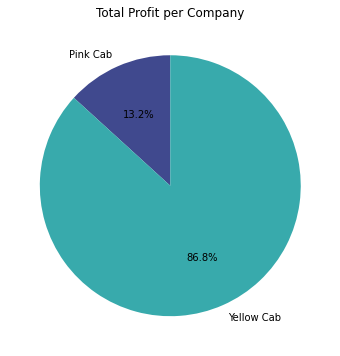

In [25]:
plt.figure(figsize=(8, 6))
plt.pie(company_profit.values, labels=company_profit.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('mako', n_colors=2))
plt.title('Total Profit per Company')
plt.show()



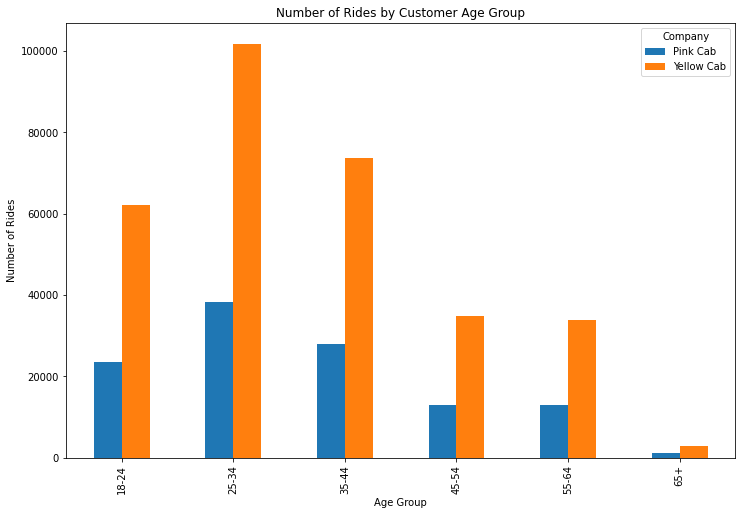

In [23]:
# Categorize age into groups
data['Age Group'] = pd.cut(data['Age'], bins=[18, 24, 34, 44, 54, 64, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# Calculate the number of rides by age group
age_rides = data.groupby(['Age Group', 'Company']).size().unstack()

# Plot the number of rides by age group
age_rides.plot(kind='bar', figsize=(12, 8))
plt.title('Number of Rides by Customer Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Rides')
plt.show()


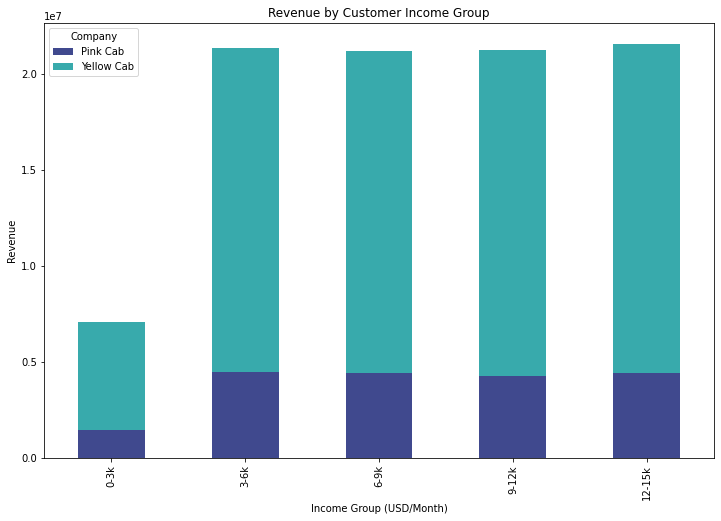

In [26]:
income_revenue.plot(kind='bar', stacked=True, figsize=(12, 8), color=sns.color_palette('mako', n_colors=2))
plt.title('Revenue by Customer Income Group')
plt.xlabel('Income Group (USD/Month)')
plt.ylabel('Revenue')
plt.legend(title='Company')
plt.show()


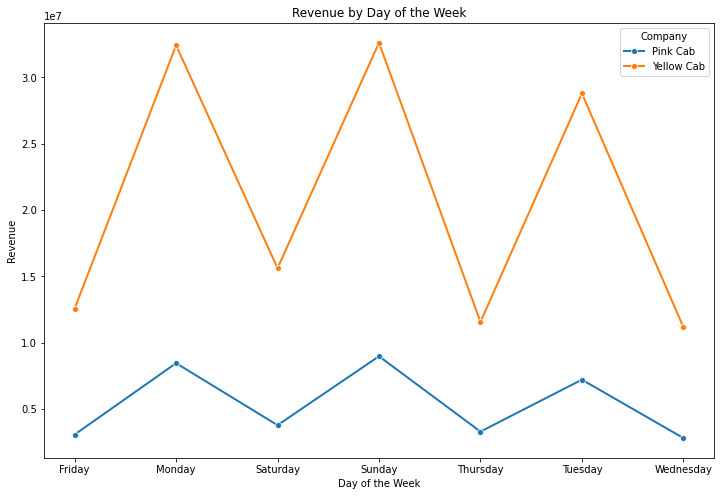

In [27]:
plt.figure(figsize=(12, 8))
sns.lineplot(x=day_revenue.index, y=day_revenue.iloc[:, 0], label=day_revenue.columns[0], data=day_revenue, marker='o', lw=2, palette='mako')
sns.lineplot(x=day_revenue.index, y=day_revenue.iloc[:, 1], label=day_revenue.columns[1], data=day_revenue, marker='o', lw=2, palette='mako')
plt.title('Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue')
plt.legend(title='Company')
plt.show()


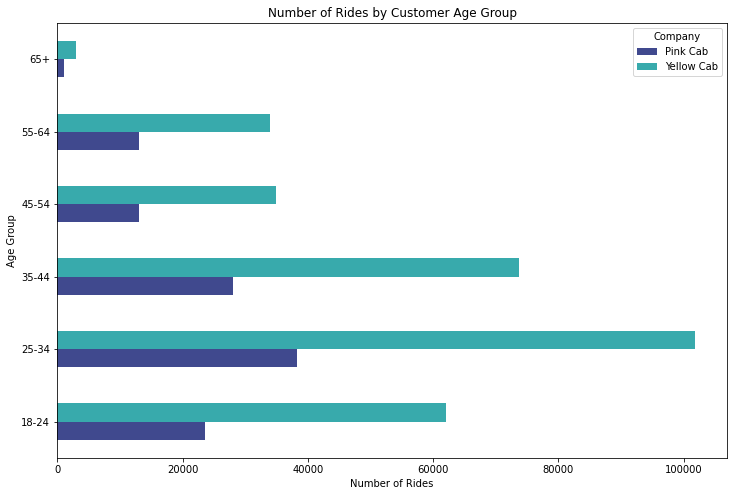

In [28]:
age_rides.plot(kind='barh', figsize=(12, 8), color=sns.color_palette('mako', n_colors=2))
plt.title('Number of Rides by Customer Age Group')
plt.ylabel('Age Group')
plt.xlabel('Number of Rides')
plt.legend(title='Company')
plt.show()
